# Camera Traps and Snow Applications

- Catherine Breen, cbreen@uw.edu
- Cassie Lumbrazo, lumbraca@uw.edu

## What is a camera trap?

- A camera trap (sometimes referred to as a remote camera or hunting camera) is similar to a normal camera except they:
    - *1) can detect  and take pictures when motion is in their vicinity.*
    - *2) can take pictures at consistent intervals at settings preset by the user.*  
    - *3) are designed to withstand harsh conditions and to be left up for long periods of time.* 
- Their potential for snow hydrology is exciting. Consistent daily camera trap photos can be analyzed contiously to form a *time-lapse* of snow conditions at one location. They can operate in sub-freezing temperatures and during storms -- conditions when access with other types of measurements would have been difficult. 

## Camera Traps and SnowEx
- Camera traps were installed in both the 2017 and 2020 SnowEx campaigns. 
- During the 2020 SnowEx field campaign, 30 cameras were installed in Grand Mesa, CO between September and May. 
- Cameras were installed across a vegetation gradient on a scale of 1 (least vegetation and ) to 9 (most vegetation). Within each vegetation class, there were three sub-classes of snow depths: shallow, intermediate, and deep snow, that were derived from 2017 SnowEx lidar measurements. 
- 2017 camera trap time-lapse imagery has been submitted to the NSIDC (Raleigh & Lumbrazo 2021). 2020 time-lapse is in progress for submission to the NSIDC with estimation of submission in summer 2021. 

### Pulling and visualizing camera trap data

We will now pull some time-lapse imagery for one camera from the 2020 SnowEx field campaign. This is camera E9B. We will pull images and display a couple from various times of the winter season. 

In [4]:
!aws s3 sync --no-progress s3://snowex-data/tutorial-data/camera-trap/ /tmp/camera-trap

In [5]:
from IPython.display import Image 
pil_img = Image(filename='/tmp/camera-trap/WSCT*.JPG')
display(pil_img)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/camera-trap/WSCT*.JPG'

In [ ]:
pil_img = Image(filename='/tmp/camera-trap/WSCT0378.JPG')
display(pil_img)

In [ ]:
pil_img = Image(filename='/tmp/camera-trap/WSCT0742.JPG')
display(pil_img)

- What do you notice? Is this an open or closed canopy site? 
- Can you see the snow rising and falling on the pole? 
- What are some snow properties that you might be able to measure using these devices? 

## Applications

### Snow Depth

Installing snow poles in front of camera trap images can provide low-cost, long-term snow depth timeseries. Using manual and automated methods, one can find the snow depth by finding the difference between the number of pixels in a snow-free image and an image with snow, and converting the difference from pixels to centimeters. 

Snow depths from the 2020 SnowEx timelapse imagery have been manually processed with estimation of submission to the NSIDC database in summer 2021 (*in progress* Breen et al. 2021). Below we will explore the dataset.

#### Step 1: Grab all the pit and camera locations

*code credit: Micah Johnson*

The code block uses geopandas, matplotlib and pandas libraries to look at tabular data on the SnowEx SQL database. We will compare the camera trap locations to the 2020 snow pit locations on the Grand Mesa

In [2]:
import snowexsql.db
from snowexsql.db import get_db
from snowexsql.data import PointData, SiteData
from snowexsql.conversions import query_to_geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Connect to the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

# Grab all the point data that was that was measured with a camera-trap
qry = session.query(PointData)
qry = qry.filter(PointData.instrument == 'camera-trap')

# Convert it to a geopandas df
camera_depths = query_to_geopandas(qry, engine)

# Grab all the unique pits geometry objects (locations)
qry = session.query(SiteData.geom).distinct()
pits = query_to_geopandas(qry, engine)

# Print out how many of each that we found
print(f'Found {len(camera_depths["geom"].unique())} camera trap locations')
print(f'Found {len(pits.index)} pit site locations')

# End our database session to avoid hanging transactions
session.close()


Found 0 camera trap locations
Found 155 pit site locations


#### Step 2: Plot our camera and Pit locations

/srv/conda/envs/notebook/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


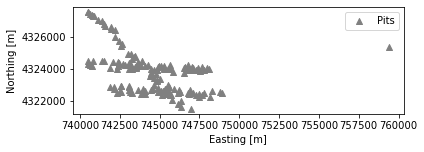

In [3]:
# plot our pits as triangles
ax = pits.plot(marker='^', color='gray', label='Pits')

# Plot our cameras as squares
ax = camera_depths.plot(ax=ax, color='magenta', marker='s', label='Camera Traps')

# Don't use scientific notation on the ticks for utm coords
ax.ticklabel_format(style='plain', useOffset=False)
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.legend()
plt.tight_layout()
plt.show()

- What do you notice? Is there overlap between the snow pit and camera trap locations?
- How might the two datasets be compared?

#### Step 3: Grab/Plot the Vegetated and Open Camera sites

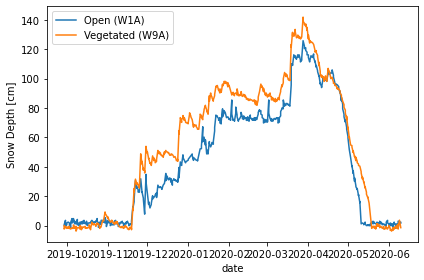

In [4]:
# Grab the open site data from the db
open_site = 'W1A'
veg_site = 'W9A'
qry = session.query(PointData).filter(PointData.equipment.contains(open_site))
df_open = query_to_geopandas(qry,engine)

# Grab the vegetated site from the db
qry = session.query(PointData).filter(PointData.equipment.contains(veg_site))
df_veg = query_to_geopandas(qry,engine)

# Set the date as the index for easy plotting/reading
df_open = df_open.set_index('date')
df_veg = df_veg.set_index('date')

# Plot the 2 datasets by date!
ax = df_open['value'].plot(label=f'Open ({open_site})')
df_veg['value'].plot(ax=ax, label=f'Vegetated ({veg_site})')

# Mess with some labeling to make it look nice
ax.legend()
ax.set_ylabel('Snow Depth [cm]')
plt.tight_layout()
plt.show()

- What do you notice about the differences between the open and closed canopy site? 
- What might be some drawbacks to this method? 
- What would it look like to map and compare all the closed canopy sites to all the open canopy sites? 

## Current and Future Work

### Snow Depth

Automated methods to extract snow depth using the Hough Transform (Currier et al. 2017) have been used on this (*in progress* Breen et al. 2021). The available automated and manual codes are available on GitHub: XX. 

### Other snow properties
Camera traps have many more applications for snow. One is using them to improve understanding of snow in trees. Cassie Lumbrazo and the Hydrology Lab at the UW https://www.zooniverse.org/projects/mozerm/snow-spotter have uploaded 1000s of photos in a citizen science project to increase labeling efforts for snow in trees and provide educational opportunities to learn about snow.

- How else might you use these images to advance SnowEx and snow hydrology?

**Thank you for attending this tutorial! We look forward to see what you will find in these datasets!**

*Acknowledgements: Anthony Arendt, Scott Henderson, Carrie Vuyovich, Ryan Currier, Megan Mason, Micah Johhnson*